<a href="https://colab.research.google.com/github/VitaliiVitalii/test.ML/blob/joy.yo/car_detector_test1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vitaliitkachuk","key":"96ec7965281d6bffeebb9eff2aa817a6"}'}

In [2]:
import os
# Створюємо каталог для Kaggle
os.makedirs('/root/.kaggle', exist_ok=True)

# Копіюємо файл kaggle.json в новий каталог
!cp kaggle_api_key.json /root/.kaggle/
!chmod 600 ~/.kaggle/kaggle_api_key.json
!kaggle datasets download -d boulahchichenadir/cars-object-detection
!unzip cars-object-detection.zip

cp: cannot stat 'kaggle_api_key.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle_api_key.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/boulahchichenadir/cars-object-detection
License(s): CC0-1.0
 70% 25.0M/35.9M [00:00<00:00, 45.8MB/s]
100% 35.9M/35.9M [00:00<00:00, 52.6MB/s]
Archive:  cars-object-detection.zip
  inflating: DATA/DATA/test/car180.jpg  
  inflating: DATA/DATA/test/car180.xml  
  inflating: DATA/DATA/test/car181.jpg  
  inflating: DATA/DATA/test/car181.xml  
  inflating: DATA/DATA/test/car182.jpg  
  inflating: DATA/DATA/test/car182.xml  
  inflating: DATA/DATA/test/car186.jpg  
  inflating: DATA/DATA/test/car186.xml  
  inflating: DATA/DATA/test/car187.jpg  
  inflating: DATA/DATA/test/car187.xml  
  inflating: DATA/DATA/test/car188.jpg  
  inflating: DATA/DATA/test/car188.xml  
  inflating: DATA/DATA/test/car189.jpg  
  inflating: DATA/DATA/test/car189.xml  
  inflating: DATA/DATA/test/car190.jpg  
  inflating: 

In [3]:
!wget https://github.com/nguyentruonglau/cars-dataset/archive/master.zip -O master.zip
!unzip master.zip

--2024-09-23 17:04:52--  https://github.com/nguyentruonglau/cars-dataset/archive/master.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/nguyentruonglau/cars-dataset/zip/main [following]
--2024-09-23 17:04:53--  https://codeload.github.com/nguyentruonglau/cars-dataset/zip/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.10
Connecting to codeload.github.com (codeload.github.com)|140.82.113.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [      <=>           ]  30.71M  28.3MB/s    in 1.1s    

2024-09-23 17:04:54 (28.3 MB/s) - ‘master.zip’ saved [32197530]

Archive:  master.zip
92cc4ce56bf3a0ad2bb47270cf43c6147b95c668
   creating: cars-dataset-main/
   creating: cars-dataset-main/Cars/
   creating: c

In [4]:
!git clone https://github.com/batraktar/car-detection-xml-annotations.git
!git clone https://github.com/batraktar/data-sets-car-xml5.git
!git clone https://github.com/batraktar/data-sets-car-xml.git
!git clone https://github.com/batraktar/data-sets-cars-xml2.git
!git clone https://github.com/batraktar/data-sets-cars-xml3.git
!git clone https://github.com/batraktar/data-sets-cars-xml4.git

Cloning into 'car-detection-xml-annotations'...
remote: Enumerating objects: 1030, done.
remote: Counting objects: 100% (1030/1030), done.
remote: Compressing objects: 100% (517/517), done.
remote: Total 1030 (delta 513), reused 1028 (delta 512), pack-reused 0 (from 0)
Receiving objects: 100% (1030/1030), 19.98 MiB | 29.52 MiB/s, done.
Resolving deltas: 100% (513/513), done.
Cloning into 'data-sets-car-xml5'...
remote: Enumerating objects: 805, done.
remote: Counting objects: 100% (805/805), done.
remote: Compressing objects: 100% (412/412), done.
remote: Total 805 (delta 393), reused 805 (delta 393), pack-reused 0 (from 0)
Receiving objects: 100% (805/805), 18.14 MiB | 30.05 MiB/s, done.
Resolving deltas: 100% (393/393), done.
Cloning into 'data-sets-car-xml'...
remote: Enumerating objects: 3803, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3803 (delta 0), reused 3 (delta 0), pack-reused 3800 (from 1)
Receiving objects:

In [5]:
import os
import shutil
from pathlib import Path

data_directories = [
    'DATA/DATA/train',
    'car-detection-xml-annotations/train',
    'data-sets-car-xml/train',
    'data-sets-cars-xml2/train',
    'data-sets-cars-xml3/train',
    'data-sets-cars-xml4/train',
    'data-sets-car-xml5/train'
]

target_images = Path('cars-dataset-main/Cars/JPEGImages')
target_annotations = Path('cars-dataset-main/Cars/Annotations')

def move_files(directory, target_images, target_annotations):
    if not Path(directory).exists():
        return

    for filename in os.listdir(directory):
        source_file = Path(directory) / filename
        if filename.endswith('.jpg'):
            shutil.move(str(source_file), str(target_images / filename))
        elif filename.endswith('.xml'):
            shutil.move(str(source_file), str(target_annotations / filename))

# Переміщення файлів
for directory in data_directories:
    move_files(directory, target_images, target_annotations)

# Видалення порожніх директорій
for directory in data_directories:
    dir_path = Path(directory)
    if dir_path.exists() and not any(dir_path.iterdir()):  # Перевірка на порожнечу
        dir_path.rmdir()  # Видалення директорії

print("Файли переміщено успішно!")


Файли переміщено успішно!


In [12]:
import os
import shutil
from pathlib import Path

data_directories = [
    'DATA/DATA/test',
    'car-detection-xml-annotations/test',
    'data-sets-car-xml/test',
    'data-sets-cars-xml2/test',
    'data-sets-cars-xml3/test',
    'data-sets-cars-xml4/test',
    'data-sets-car-xml5/test'
]

target_images = Path('cars-dataset-main/Test/Images')
target_annotations = Path('cars-dataset-main/Test/Annotations')

# Ensure target directories exist
target_images.mkdir(parents=True, exist_ok=True)
target_annotations.mkdir(parents=True, exist_ok=True)

def move_files(directory, target_images, target_annotations):
    if not Path(directory).exists():
        return

    for filename in os.listdir(directory):
        source_file = Path(directory) / filename
        if filename.endswith('.jpg'):
            shutil.move(str(source_file), str(target_images / filename))
        elif filename.endswith('.xml'):
            shutil.move(str(source_file), str(target_annotations / filename))

# Move files
for directory in data_directories:
    move_files(directory, target_images, target_annotations)

# Remove empty directories
for directory in data_directories:
    dir_path = Path(directory)
    if dir_path.exists() and not any(dir_path.iterdir()):  # Check if empty
        dir_path.rmdir()  # Remove directory

print("Files moved successfully!")


Files moved successfully!


In [13]:
import os

def count_files(folder_path, extensions):
  count = 0
  for root, dirs, files in os.walk(folder_path):
    for file in files:
      if file.endswith(extensions):
        count += 1
  return count


folder_xml = 'cars-dataset-main/Cars/Annotations'
folder_jpg = 'cars-dataset-main/Cars/JPEGImages'


xml_count = count_files(folder_xml, '.xml')
jpg_count = count_files(folder_jpg, '.jpg')


print(f"Кількість .xml файлів: {xml_count}")
print(f"Кількість .jpg файлів: {jpg_count}")

Кількість .xml файлів: 3583
Кількість .jpg файлів: 3583


In [14]:
import os

def count_files(folder_path, extensions):
  count = 0
  for root, dirs, files in os.walk(folder_path):
    for file in files:
      if file.endswith(extensions):
        count += 1
  return count


folder_xml = 'cars-dataset-main/Test/Annotations'
folder_jpg = 'cars-dataset-main/Test/Images'


xml_count = count_files(folder_xml, '.xml')
jpg_count = count_files(folder_jpg, '.jpg')


print(f"Кількість .xml файлів: {xml_count}")
print(f"Кількість .jpg файлів: {jpg_count}")

Кількість .xml файлів: 110
Кількість .jpg файлів: 110


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K
import numpy as np
import os
import zipfile
import cv2
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [16]:
# Шлях до розпакованих даних
data_dir = 'cars-dataset-main'

# Шляхи до папок з зображеннями та анотаціями
img_folder = '/content/cars-dataset-main/Cars/JPEGImages'  # Папка з зображеннями
ann_folder = '/content/cars-dataset-main/Cars/Annotations'  # Папка з анотаціями

In [17]:
def parse_annotation(file_path):
    boxes = []  # Список для зберігання координат bounding box

    # Перевірка, чи існує файл анотації
    if not os.path.exists(file_path):
        print(f"Файл {file_path} не знайдено.")  # Виведення повідомлення, якщо файл не знайдено
        return []  # Повертаємо пустий список, якщо файл не знайдено

    try:
        tree = ET.parse(file_path)  # Парсинг XML-файлу
        root = tree.getroot()  # Отримання кореневого елемента XML

        # Проходження через всі об'єкти в XML
        for obj in root.findall('object'):
            bbox = obj.find('bndbox')  # Знаходження елемента bndbox
            # Отримання координат
            xmin = int(bbox.find('xmin').text)
            ymin = int(bbox.find('ymin').text)
            xmax = int(bbox.find('xmax').text)
            ymax = int(bbox.find('ymax').text)
            boxes.append([xmin, ymin, xmax, ymax])  # Додавання координат у список

        # Виведення повідомлення про успішне парсинг
        print(f"Успішно парсено {file_path}. Знайдено {len(boxes)} bounding box(es): {boxes}")
        return boxes  # Повертаємо список bounding box

    except Exception as e:
        print(f"Помилка при парсингу файлу {file_path}: {e}")  # Виведення повідомлення про помилку
        return []  # Повертаємо пустий список у разі помилки

def load_data(img_folder, ann_folder):
    images = []  # Список для зберігання зображень
    labels = []  # Список для зберігання міток (bounding box)
    success_images = []  # Список для успішно завантажених зображень ty
    failure_images = []  # Список для зображень без анотацій

    # Проходження через всі файли в папці зображень
    for img_file in os.listdir(img_folder):
        if img_file.endswith('.jpg'):  # Перевірка, чи файл - зображення формату .jpg
            try:
                # Читання зображення
                img_path = os.path.join(img_folder, img_file)  # Формування повного шляху до зображення
                img = cv2.imread(img_path)  # Завантаження зображення
                img = cv2.resize(img, (224, 224))  # Зміна розміру зображення на 224x224
                images.append(img)  # Додавання зображення у список

                # Формування шляху до відповідного файлу анотації
                annotation_file = img_file.replace('.jpg', '.xml')  # Заміна розширення на .xml
                annotation_path = os.path.join(ann_folder, annotation_file)  # Формування шляху до файлу анотації

                print(f"Перевірка файлу анотації: {annotation_path}")  # Виведення повідомлення про перевірку файлу

                # Перевірка, чи існує файл анотації
                if os.path.exists(annotation_path):
                    boxes = parse_annotation(annotation_path)  # Парсинг анотацій
                    labels.append(boxes)  # Додавання міток у список
                    success_images.append(img_file)  # Додавання успішно завантаженого зображення
                else:
                    print(f"Файл анотації не знайдено для {img_file}")  # Повідомлення, якщо файл анотації не знайдено
                    failure_images.append(img_file)  # Додавання зображення до списку невдалих

            except Exception as e:
                print(f"Error processing {img_file}: {e}")  # Повідомлення про помилку при обробці зображення

    # Виведення загальної інформації про завантажені зображення та мітки
    print(f"Завантажено {len(images)} зображень та {len(labels)} міток.")
    print(f"Успішно завантажено: {len(success_images)} зображень")
    print(f"Не завантажено: {len(failure_images)} зображень")
    return np.array(images), labels  # Повертаємо масив зображень та міток

# Завантаження тренувальних даних
train_images, train_labels = load_data(img_folder, ann_folder)  # Виклик функції завантаження даних


Показано результат, скорочений до останніх рядків (5000).
Успішно парсено /content/cars-dataset-main/Cars/Annotations/33.xml. Знайдено 7 bounding box(es): [[287, 89, 328, 135], [511, 123, 559, 165], [408, 64, 439, 95], [357, 50, 389, 79], [438, 19, 461, 40], [397, 8, 419, 26], [361, 11, 381, 32]]
Перевірка файлу анотації: /content/cars-dataset-main/Cars/Annotations/car417.xml
Успішно парсено /content/cars-dataset-main/Cars/Annotations/car417.xml. Знайдено 1 bounding box(es): [[127, 138, 388, 261]]
Перевірка файлу анотації: /content/cars-dataset-main/Cars/Annotations/images31_jpg.rf.fbe058d9f3b37a57e4ede2d908e2d2ae.xml
Успішно парсено /content/cars-dataset-main/Cars/Annotations/images31_jpg.rf.fbe058d9f3b37a57e4ede2d908e2d2ae.xml. Знайдено 1 bounding box(es): [[37, 43, 604, 273]]
Перевірка файлу анотації: /content/cars-dataset-main/Cars/Annotations/images7_jpg.rf.19d0f80ec75169a56883be7905974b0e.xml
Успішно парсено /content/cars-dataset-main/Cars/Annotations/images7_jpg.rf.19d0f80ec7516

In [18]:
def iou(y_true, y_pred):
    # Обчислюємо координати
    x1_true, y1_true, x2_true, y2_true = tf.split(y_true, 4, axis=-1)
    x1_pred, y1_pred, x2_pred, y2_pred = tf.split(y_pred, 4, axis=-1)

    # Обчислення площі перетину
    inter_x1 = K.maximum(x1_true, x1_pred)
    inter_y1 = K.maximum(y1_true, y1_pred)
    inter_x2 = K.minimum(x2_true, x2_pred)
    inter_y2 = K.minimum(y2_true, y2_pred)

    inter_area = K.maximum(inter_x2 - inter_x1, 0) * K.maximum(inter_y2 - inter_y1, 0)

    # Обчислення площі об'єднання
    true_area = (x2_true - x1_true) * (y2_true - y1_true)
    pred_area = (x2_pred - x1_pred) * (y2_pred - y1_pred)

    union_area = true_area + pred_area - inter_area

    return K.mean(inter_area / union_area)

In [19]:
def create_model():
    try:
        # Використання базової моделі MobileNetV2 без верхнього шару
        base_model = tf.keras.applications.MobileNetV2(
            input_shape=(224, 224, 3),  # Визначення розміру входу
            include_top=False,  # Без верхнього шару (класіфікатор)
            weights='imagenet'  # Завантаження ваг з ImageNet
        )
        base_model.trainable = False  # Заморожуємо ваги базової моделі

        # Створення власної моделі
        model = models.Sequential([
            layers.Input(shape=(224, 224, 3)),  # Явно визначаємо вхідний шар
            base_model,  # Додаємо базову модель
            layers.GlobalAveragePooling2D(),  # Глобальне середнє згортання для зменшення розміру
            layers.Dense(1024, activation='relu'),  # Повнозв'язний шар з 1024 нейронами
            layers.Dense(4, activation='linear')  # Вихідний шар для координат bounding box (4 координати)
        ])

        # Компіляція моделі
        model.compile(
            optimizer='adam',  # Оптимізатор Adam
            loss='mean_squared_error',  # Втрата для регресії
            metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanSquaredError(), iou]  # Метрики для оцінки
        )

        print("Модель успішно створено.")
        return model  # Повертаємо модель
    except Exception as e:
        print(f"Помилка при створенні моделі: {e}")  # Виведення повідомлення про помилку
        return None  # Повертаємо None, якщо сталася помилка

# Створення моделі
model = create_model()

# Перегляд структури моделі (опціонально)
if model:
    model.summary()  # Виведення структури моделі


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Модель успішно створено.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,573,828 (13.63 MB)

 Trainable params: 1,315,844 (5.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [20]:
# Визначаємо максимальну кількість bounding boxes
max_boxes = max(len(boxes) for boxes in train_labels)

# Перетворення train_labels у масив NumPy
train_labels_array = []

for boxes in train_labels:
    if len(boxes) > 0:
        # Використовуємо перші 4 значення
        train_labels_array.append(boxes[0])
    else:
        # Якщо немає bounding boxes, додаємо [0, 0, 0, 0]
        train_labels_array.append([0, 0, 0, 0])

# Конвертуємо у масив NumPy з фіксованою формою
train_labels_array = np.array(train_labels_array, dtype=np.float32)

# Переконайтеся, що є правильна форма
print("Форма train_labels_array:", train_labels_array.shape)  # Повинно бути (3583, 4)

Форма train_labels_array: (3583, 4)


In [21]:
import numpy as np

# Припустимо, у нас вже є train_images та train_labels_array
# Кількість зображень
num_images = len(train_images)

# Визначте пропорції
train_size = int(0.8 * num_images)  # 80% для навчання
val_size = num_images - train_size    # 20% для валідації

# Створіть масив індексів і перемішайте їх
indices = np.arange(num_images)
np.random.shuffle(indices)

# Розділіть індекси на навчальні та валідаційні
train_indices = indices[:train_size]
val_indices = indices[train_size:]

# Створіть навчальні та валідаційні набори
train_images_final = train_images[train_indices]
train_labels_final = train_labels_array[train_indices]

val_images = train_images[val_indices]
val_labels = train_labels_array[val_indices]


In [ ]:
import json
# Налаштування параметрів навчання
epochs = 20  # Кількість епох
batch_size = 16  # Розмір партії

# Вибір підмножини даних
subset_size = 512
train_images_subset = train_images_final[:subset_size]
train_labels_subset = train_labels_final[:subset_size]

train_images_subset = train_images_final[:subset_size]
train_labels_subset = train_labels_final[:subset_size]

# Створення tf.data.Dataset для навчання
train_dataset = tf.data.Dataset.from_tensor_slices((train_images_subset, train_labels_subset)).shuffle(buffer_size=1024).batch(batch_size)

# Створення tf.data.Dataset для валідації
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(batch_size)

# Навчання моделі
try:
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=epochs,
        verbose=1
    )
    print("Навчання завершено.")

    with open('training_history.json', 'w') as f:
      json.dump(history.history, f)

except Exception as e:
    print(f"Помилка під час навчання моделі: {e}")


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - iou: 0.0109 - loss: 103437.2656 - mean_absolute_error: 256.8464 - mean_squared_error: 103437.2656 - val_iou: 0.2750 - val_loss: 15943.8506 - val_mean_absolute_error: 103.0581 - val_mean_squared_error: 15943.8506
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - iou: 0.3723 - loss: 13683.6289 - mean_absolute_error: 91.1885 - mean_squared_error: 13683.6289 - val_iou: 0.4064 - val_loss: 11634.1191 - val_mean_absolute_error: 82.8091 - val_mean_squared_error: 11634.1191
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - iou: 0.4046 - loss: 11727.1172 - mean_absolute_error: 82.8329 - mean_squared_error: 11727.1172 - val_iou: 0.4455 - val_loss: 10813.2266 - val_mean_absolute_error: 77.7532 - val_mean_squared_error: 10813.2266
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - iou: 0.4315 - loss: 10916.1221 - mean_absolute_error: 80.4859 - mean_squared_error: 10916.1221 - val_iou: 0.4344 - val_loss: 10218.0293 - val_mean_absolute_error: 7

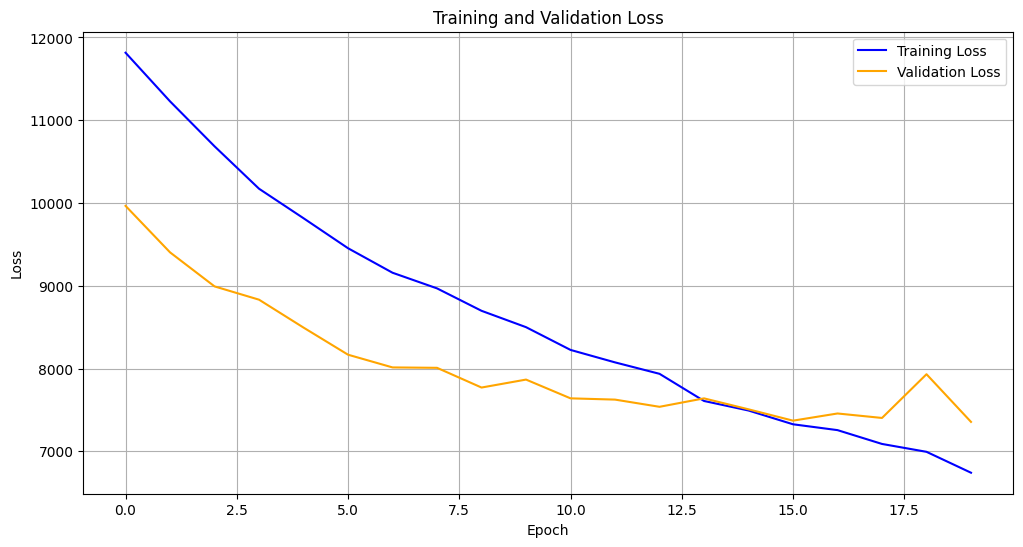

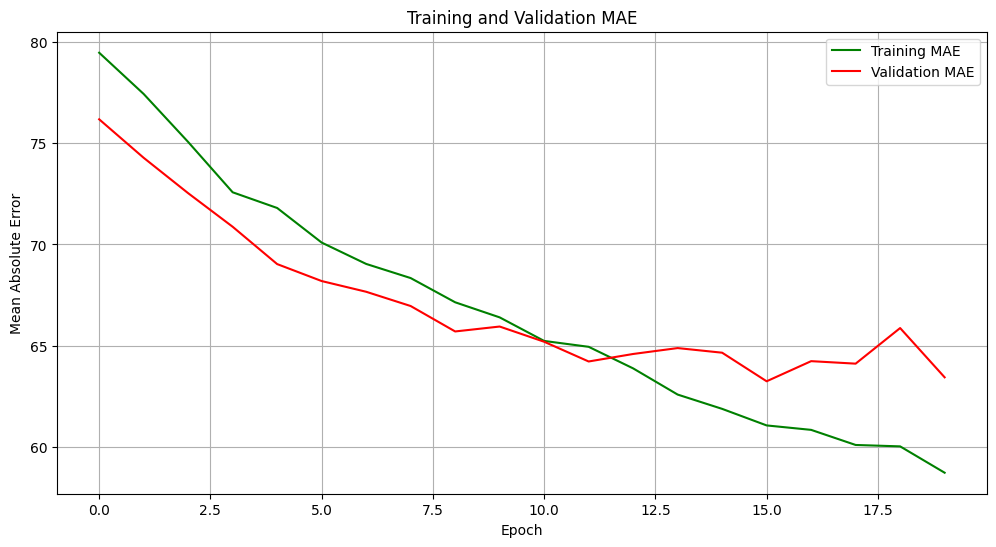

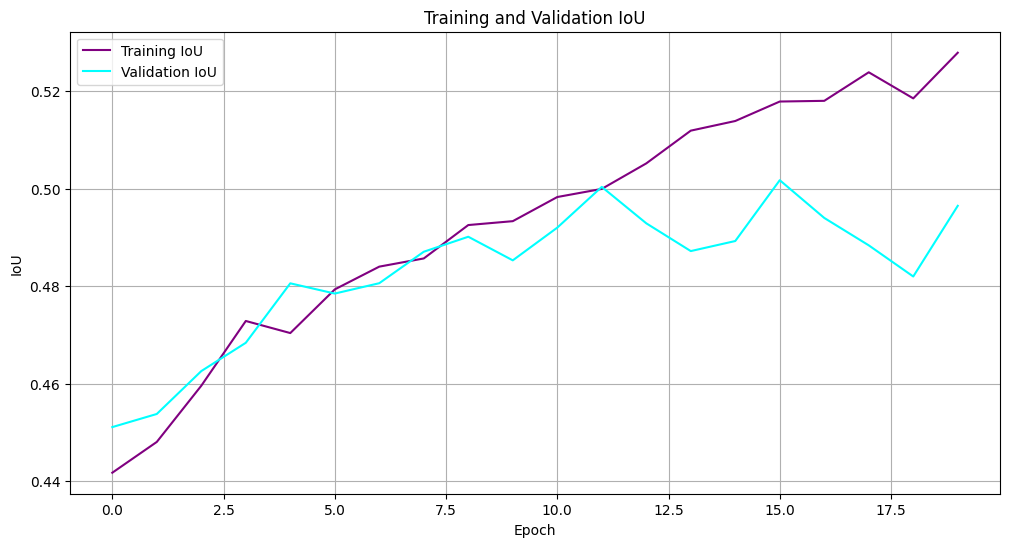

In [ ]:
# Графік втрат
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid()
plt.show()

# Графік середньої абсолютної помилки
plt.figure(figsize=(12, 6))
plt.plot(history.history['mean_absolute_error'], label='Training MAE', color='green')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE', color='red')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.grid()
plt.show()

# Графік IoU
plt.figure(figsize=(12, 6))
plt.plot(history.history['iou'], label='Training IoU', color='purple')
plt.plot(history.history['val_iou'], label='Validation IoU', color='cyan')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.title('Training and Validation IoU')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import json

# Зберігаємо індекси навчальних зразків
trained_indices = list(range(subset_size))  # або конкретні ідентифікатори

# Збереження індексів
with open('trained_indices.json', 'w') as f:
    json.dump(trained_indices, f)



In [ ]:
import json
import tensorflow as tf

# Зчитування індексів з файлу
print("Зчитування індексів з файлу...")
with open('trained_indices.json', 'r') as f:
    trained_indices = json.load(f)
print(f"Зчитано {len(trained_indices)} індексів.")

# Ваш повний набір зображень і міток
all_images = train_images_final  # Ваш повний набір зображень
all_labels = train_labels_final   # Ваш повний набір міток

print("Фільтрація даних, щоб виключити вже використані...")
remaining_images = [img for i, img in enumerate(all_images) if i not in trained_indices]
remaining_labels = [label for i, label in enumerate(all_labels) if i not in trained_indices]
print(f"Залишилось {len(remaining_images)} зображень для донавчання.")

# Створення нового датасету для донавчання
print("Створення нового датасету для донавчання...")
train_dataset_remaining = tf.data.Dataset.from_tensor_slices((remaining_images, remaining_labels))
train_dataset_remaining = train_dataset_remaining.shuffle(buffer_size=1024).batch(batch_size)
print("Датасет створено.")

# Додавання донавчання моделі
# print("Початок донавчання моделі...")
# Ваш код для донавчання моделі, наприклад:
# model.fit(train_dataset_remaining, epochs=num_epochs)

# print("Донавчання завершено.")


Зчитування індексів з файлу...
Зчитано 512 індексів.
Фільтрація даних, щоб виключити вже використані...
Залишилось 2354 зображень для донавчання.
Створення нового датасету для донавчання...
Датасет створено.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


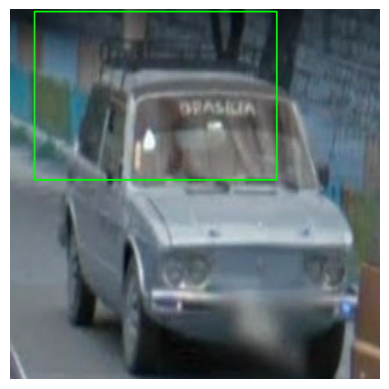

In [ ]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    # Зміна розміру зображення
    image_resized = cv2.resize(image, (224, 224))
    # Нормалізація пікселів до діапазону [0, 1]
    image_normalized = image_resized / 255.0
    return image_normalized

def draw_boxes(image, boxes):
    for box in boxes:
        xmin, ymin, xmax, ymax = map(int, box)
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    plt.imshow(image)
    plt.axis('off')  # Приховати осі
    plt.show()

def load_test_images(test_folder):
    test_images = []
    for img_file in os.listdir(test_folder):
        if img_file.endswith('.jpg') or img_file.endswith('.png'):
            img_path = os.path.join(test_folder, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                test_images.append(img)
    return np.array(test_images)

# Шлях до папки з тестовими зображеннями
test_folder = '/content/data-sets-cars-xml3/valid'  # Вкажіть свій шлях

# Завантаження тестових зображень
test_images = load_test_images(test_folder)

# Переконайтеся, що є зображення для тестування
if len(test_images) > 0:
    # Вибір випадкового тестового зображення
    random_index = random.randint(0, len(test_images) - 1)
    test_image = test_images[random_index]

    # Передбачення
    test_image_preprocessed = preprocess_image(test_image)
    predicted_box = model.predict(np.expand_dims(test_image_preprocessed, axis=0))

    # Відображення результату
    draw_boxes(test_image, [predicted_box[0]])
else:
    print("Не знайдено тестових зображень у вказаній папці.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


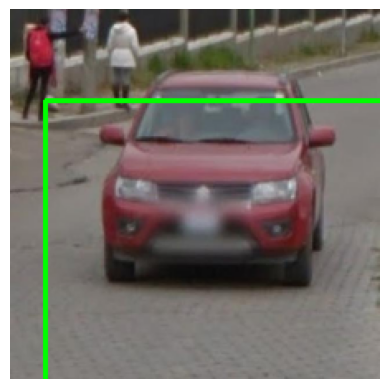

In [ ]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    # Зміна розміру зображення
    image_resized = cv2.resize(image, (224, 224))
    # Нормалізація пікселів до діапазону [0, 1]
    image_normalized = image_resized / 255.0
    # Повернення зображення у форматі float32
    return image_normalized.astype(np.float32)

def draw_boxes(image, boxes):
    for box in boxes:
        xmin, ymin, xmax, ymax = map(int, box)
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Перетворення кольорів для відображення
    plt.axis('off')  # Приховати осі
    plt.show()

def load_test_images(test_folder):
    test_images = []
    for img_file in os.listdir(test_folder):
        if img_file.endswith('.jpg') or img_file.endswith('.png'):
            img_path = os.path.join(test_folder, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = preprocess_image(img)  # Обробка зображення під час завантаження
                test_images.append(img)
    return np.array(test_images)

# Шлях до папки з тестовими зображеннями
test_folder = '/content/data-sets-cars-xml3/valid'  # Вкажіть свій шлях

# Завантаження тестових зображень
test_images = load_test_images(test_folder)

# Переконайтеся, що є зображення для тестування
if len(test_images) > 0:
    # Вибір випадкового тестового зображення
    random_index = random.randint(0, len(test_images) - 1)
    test_image = test_images[random_index]

    # Передбачення
    predicted_box = model.predict(np.expand_dims(test_image, axis=0))

    # Відображення результату
    draw_boxes(test_image, [predicted_box[0]])
else:
    print("Не знайдено тестових зображень у вказаній папці.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


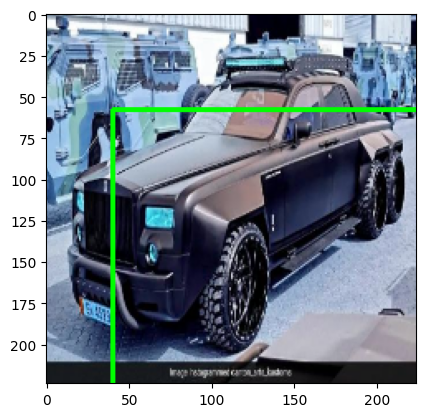

In [ ]:
def draw_boxes(image, boxes):
    for box in boxes:
        # Перетворення координат у цілі числа
        xmin, ymin, xmax, ymax = map(int, box)
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    plt.imshow(image)
    plt.show()

# Передбачення на тестовому зображенні
test_image = train_images[91]  # Беремо перше тренувальне зображення
predicted_box = model.predict(np.expand_dims(test_image, axis=0))

# Відображення результату
draw_boxes(test_image, [predicted_box[0]])


In [ ]:
model.save('car_detector_done_v1.keras')


In [ ]:
num_epochs = 10
batch_size = 16
model.fit(train_dataset_remaining, epochs=num_epochs)
print("Донавчання завершено.")
with open('continuing_education.json', 'w') as f:
      json.dump(history.history, f)

Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 92s 613ms/step - iou: 0.4831 - loss: 8373.8896 - mean_absolute_error: 66.9455 - mean_squared_error: 8373.8896
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 88s 592ms/step - iou: 0.4968 - loss: 8062.8975 - mean_absolute_error: 64.6336 - mean_squared_error: 8062.8975
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 148s 621ms/step - iou: 0.5097 - loss: 8077.3506 - mean_absolute_error: 63.1576 - mean_squared_error: 8077.3506
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 88s 598ms/step - iou: 0.5116 - loss: 7485.4897 - mean_absolute_error: 62.0088 - mean_squared_error: 7485.4897
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 143s 602ms/step - iou: 0.5136 - loss: 7570.7188 - mean_absolute_error: 61.3514 - mean_squared_error: 7570.7188
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 142s 602ms/step - iou: 0.5215 - loss: 7117.5483 - mean_absolute_error: 59.8956 - mean_squared_error: 7117.5483
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 87s 589ms/step - iou: 0.5212 - loss: 6958.2974 - mean_abs

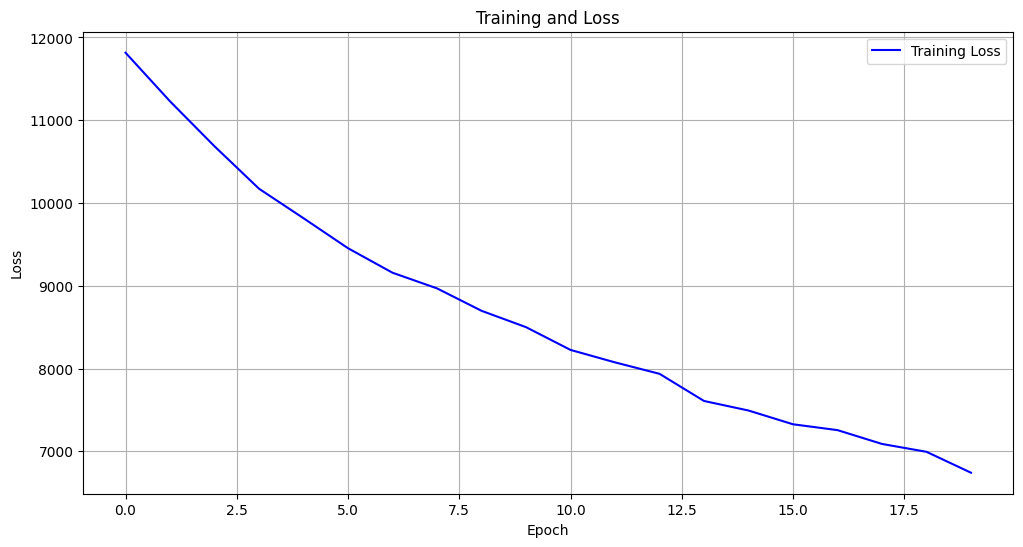

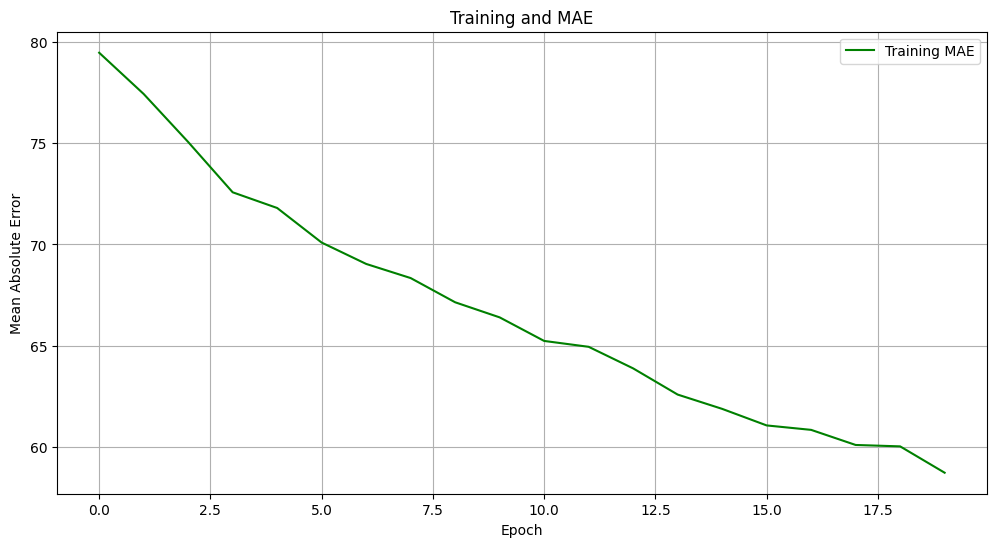

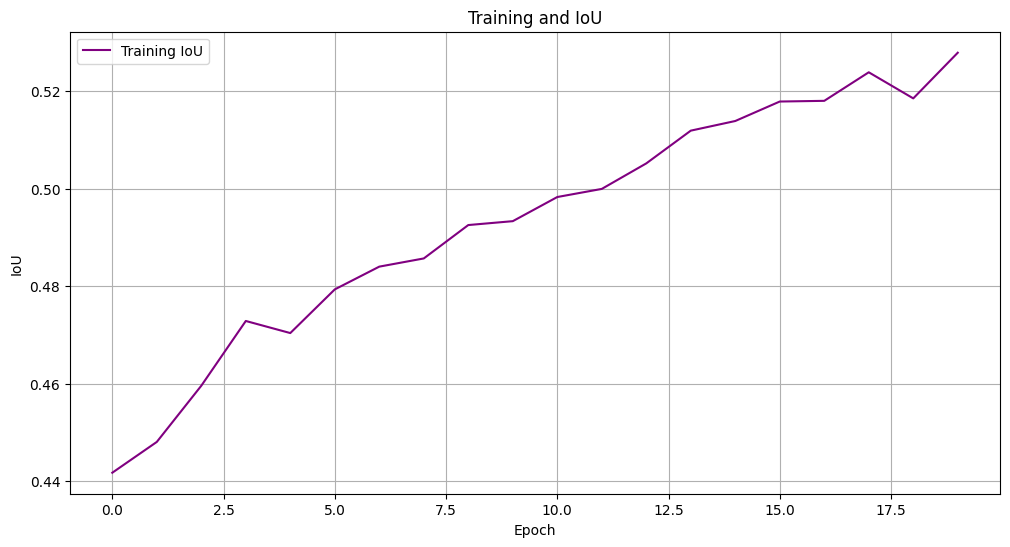

In [ ]:
# Графік втрат
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Loss')
plt.legend()
plt.grid()
plt.show()

# Графік середньої абсолютної помилки
plt.figure(figsize=(12, 6))
plt.plot(history.history['mean_absolute_error'], label='Training MAE', color='green')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training and MAE')
plt.legend()
plt.grid()
plt.show()

# Графік IoU
plt.figure(figsize=(12, 6))
plt.plot(history.history['iou'], label='Training IoU', color='purple')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.title('Training and IoU')
plt.legend()
plt.grid()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


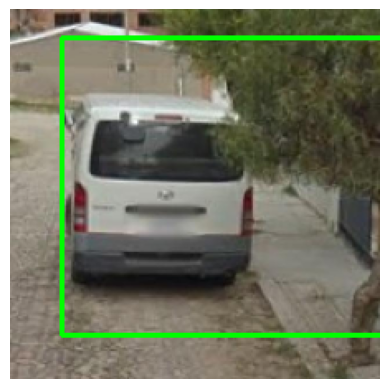

In [ ]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image):
    # Зміна розміру зображення
    image_resized = cv2.resize(image, (224, 224))
    # Нормалізація пікселів до діапазону [0, 1]
    image_normalized = image_resized / 255.0
    # Повернення зображення у форматі float32
    return image_normalized.astype(np.float32)

def draw_boxes(image, boxes):
    for box in boxes:
        xmin, ymin, xmax, ymax = map(int, box)
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Перетворення кольорів для відображення
    plt.axis('off')  # Приховати осі
    plt.show()

def load_test_images(test_folder):
    test_images = []
    for img_file in os.listdir(test_folder):
        if img_file.endswith('.jpg') or img_file.endswith('.png'):
            img_path = os.path.join(test_folder, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = preprocess_image(img)  # Обробка зображення під час завантаження
                test_images.append(img)
    return np.array(test_images)

# Шлях до папки з тестовими зображеннями
test_folder = '/content/data-sets-cars-xml3/valid'  # Вкажіть свій шлях

# Завантаження тестових зображень
test_images = load_test_images(test_folder)

# Переконайтеся, що є зображення для тестування
if len(test_images) > 0:
    # Вибір випадкового тестового зображення
    random_index = random.randint(0, len(test_images) - 1)
    test_image = test_images[random_index]

    # Передбачення
    predicted_box = model.predict(np.expand_dims(test_image, axis=0))

    # Відображення результату
    draw_boxes(test_image, [predicted_box[0]])
else:
    print("Не знайдено тестових зображень у вказаній папці.")


In [ ]:
model.save('car_detector_done_v1.1.h5')

In [ ]:
# Завантаження моделі
model = load_model('car_detector_done_v1.1.keras', custom_objects={'CustomLayer': CustomLayer})

print("Модель успішно завантажена.")

# Перевірте структуру моделі
model.summary()

# Підготуйте ваші вхідні дані
input1 = np.random.rand(1, 224, 224, 3)  # Перший вхід (наприклад, зображення)
input2 = np.random.rand(1, 7, 7, 1280)   # Другий вхід (якщо є)

# Передбачення (залежно від структури моделі)
if model.input_shape[1] == input1.shape[1:]:
    predictions = model.predict(input1)  # Якщо лише один вхід
elif len(model.input_shape) > 1:
    predictions = model.predict([input1, input2])  # Якщо декілька входів
else:
    raise ValueError("Неправильна форма входу для моделі.")


NameError: name 'CustomLayer' is not defined

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,205,518 (23.67 MB)

 Trainable params: 1,315,844 (5.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 2,631,690 (10.04 MB)